# Projeto 2 - Deep Learning
* Carlos Vinicius R Gonçalves Ra:1914723
* Gabriel Sana Ferreira da Silva Ra:1914766

# Bibliotecas
Para a realização dessa atividade foi utilizada as seguintes biblioteca:
* Pandas - Biblioteca de software criada para a linguagem Python para manipulação e análise de dados.
* Numpy  - Biblioteca Python que é usada principalmente para realizar cálculos em Arrays Multidimensionais.
* Keras  - Biblioteca open-source que dispõe uma interface em Python para redes neurais artificiais. O keras age como uma interface para a biblioteca TensorFlow, do Google.
* Matplotlib - Biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos.

In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

# Importação do modelo e criação das camadas de neurônios
* Para o modelo pré-treinado da literatura, dentre os disponíveis no link (https://keras.io/api/applications/) foi utilizado o MobileNet, que por sua vez utiliza os pesos pré treinados da ImageNet.
* Foi utilizado o ‘GlobalAveragePooling2D’ para a extração das características na primeira camada.
* Foi utilizado o ‘relu’ (Rectified Linear Unit) no cálculo de função de ativação das camadas intermediárias.
* Foi utilizado a ativação ‘softmax’ na última camada, com suas devidas 3 classes para a predição das classes do dataset.

In [3]:
base_model=MobileNet(weights='imagenet',include_top=False) #importa o modelo de mobilenet e descarta a última camada de 1000 neurônios.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #adicionamos camadas densas para que o modelo possa aprender funções mais complexas e classificar para melhores resultados.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer com softmax activation

In [4]:
model=Model(inputs=base_model.input,outputs=preds)
#especificar as entradas
#especifique as saídas
#agora um modelo foi criado com base em nossa arquitetura 

In [5]:
for layer in model.layers[:20]:  
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

# Base de Dados
   Para a realização deste projeto foi necessário escolher um dataset do site kaggle para o treinamento do modelo de deep learning. O dataset selecionado pelo grupo foi o “Rock-Paper-Scissors-Images”, ou “Jo-Ken-Po”, que representa o jogo pedra papel e tesoura.  
   Esse dataset contém 2189 imagens dos gestos usados para representar uma pedra ou papel ou tesoura no jogo. Essas imagens estão separadas em pastas representando cada uma das três classes e o código a seguir é responsável por fazer a divisão entre treino (80%) e teste (20%) dessas imagens.

In [6]:
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.8, rescale=1./255, shear_range = 0.2, zoom_range = 0.2) #included in our dependencies
#Geração dos dados de treino (80%)
train_generator = train_data_gen.flow_from_directory('dataset',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 shuffle=True, subset = 'validation',class_mode='categorical')
#Divisão, teste e treino
test_generator = train_data_gen.flow_from_directory('dataset',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 shuffle=True, subset = 'training',class_mode='categorical')


Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


# Definição do otimizador, steps e realização do treinamento e teste
* O otimizador utilizado pelo grupo foi o ‘Adam’, que apresenta um melhor resultado.
* A métrica de avaliação do treinamento foi a acurácia.
* A métrica de erro utilizado foi a ‘categorical_crossentropy’, já que o dataset utilizado apresenta mais do que duas classes, impossibilitando o uso do ‘binary_crossentropy’.
* O treinamento foi realizado em 500 epochs.

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam otimizador
# função de perda será entropia cruzada categórica
# métrica de avaliação será a precisão

step_size_train=train_generator.n//train_generator.batch_size
#Treinando e testando o modelo
history = model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,
                              epochs=500,validation_data =test_generator,
                              validation_steps=(test_generator.n//test_generator.batch_size))

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
54/54 [==============================] - 33s 563ms/step - loss: 0.7984 - accuracy: 0.7511 - val_loss: 2.8332 - val_accuracy: 0.3245
Epoch 2/500
54/54 [==============================] - 13s 247ms/step - loss: 0.1909 - accuracy: 0.9346 - val_loss: 1.7724 - val_accuracy: 0.6250
Epoch 3/500
54/54 [==============================] - 16s 291ms/step - loss: 0.1047 - accuracy: 0.9632 - val_loss: 2.6271 - val_accuracy: 0.3317
Epoch 4/500
54/54 [==============================] - 16s 305ms/step - loss: 0.0862 - accuracy: 0.9750 - val_loss: 1.0373 - val_accuracy: 0.6322
Epoch 5/500
54/54 [==============================] - 16s 303ms/step - loss: 0.0971 - accuracy: 0.9725 - val_loss: 4.5178 - val_accuracy: 0.6274
Epoch 6/500
54/54 [==============================] - 16s 299ms/step - loss: 0.0701 - accuracy: 0.9764 - val_loss: 9.5787 - val_accuracy: 0.3365
Epoch 7/500
54/54 [==============================] - 17s 312ms/step - loss: 0.0956 - accuracy: 0.9745 - val_loss: 1.6418 - val_accuracy:

54/54 [==============================] - 18s 333ms/step - loss: 0.0396 - accuracy: 0.9848 - val_loss: 57.4512 - val_accuracy: 0.3341
Epoch 114/500
54/54 [==============================] - 18s 333ms/step - loss: 0.0174 - accuracy: 0.9963 - val_loss: 70.0984 - val_accuracy: 0.3365
Epoch 115/500
54/54 [==============================] - 18s 337ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 2.5083 - val_accuracy: 0.4543
Epoch 116/500
54/54 [==============================] - 19s 349ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 42.8185 - val_accuracy: 0.3245
Epoch 117/500
54/54 [==============================] - 19s 347ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 9.5193 - val_accuracy: 0.5913
Epoch 118/500
54/54 [==============================] - 19s 348ms/step - loss: 0.0029 - accuracy: 0.9984 - val_loss: 65.9858 - val_accuracy: 0.3534
Epoch 119/500
54/54 [==============================] - 19s 346ms/step - loss: 0.0162 - accuracy: 0.9962 - val_loss: 71.7023 - val_accu

Epoch 169/500
54/54 [==============================] - 19s 344ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 107.4608 - val_accuracy: 0.3293
Epoch 170/500
54/54 [==============================] - 21s 395ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 114.7476 - val_accuracy: 0.3365
Epoch 171/500
54/54 [==============================] - 19s 354ms/step - loss: 2.6225e-04 - accuracy: 1.0000 - val_loss: 112.0127 - val_accuracy: 0.3293
Epoch 172/500
54/54 [==============================] - 19s 353ms/step - loss: 5.7698e-05 - accuracy: 1.0000 - val_loss: 40.4314 - val_accuracy: 0.4928
Epoch 173/500
54/54 [==============================] - 21s 397ms/step - loss: 2.1925e-05 - accuracy: 1.0000 - val_loss: 7.3669 - val_accuracy: 0.6635
Epoch 174/500
54/54 [==============================] - 19s 352ms/step - loss: 8.7551e-06 - accuracy: 1.0000 - val_loss: 1.7648 - val_accuracy: 0.7740
Epoch 175/500
54/54 [==============================] - 17s 318ms/step - loss: 1.9974e-05 - accuracy: 

54/54 [==============================] - 17s 309ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.0599 - val_accuracy: 0.8630
Epoch 280/500
54/54 [==============================] - 16s 302ms/step - loss: 0.0215 - accuracy: 0.9966 - val_loss: 60.9927 - val_accuracy: 0.3221
Epoch 281/500
54/54 [==============================] - 16s 302ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 27.1026 - val_accuracy: 0.3269
Epoch 282/500
54/54 [==============================] - 17s 307ms/step - loss: 0.0232 - accuracy: 0.9919 - val_loss: 38.0822 - val_accuracy: 0.3245
Epoch 283/500
54/54 [==============================] - 16s 304ms/step - loss: 5.2509e-05 - accuracy: 1.0000 - val_loss: 6.0436 - val_accuracy: 0.4976
Epoch 284/500
54/54 [==============================] - 16s 302ms/step - loss: 4.6440e-04 - accuracy: 1.0000 - val_loss: 0.4862 - val_accuracy: 0.9207
Epoch 285/500
54/54 [==============================] - 16s 301ms/step - loss: 0.0181 - accuracy: 0.9969 - val_loss: 19.3160 - v

54/54 [==============================] - 19s 342ms/step - loss: 0.0121 - accuracy: 0.9974 - val_loss: 69.4624 - val_accuracy: 0.3341
Epoch 390/500
54/54 [==============================] - 19s 343ms/step - loss: 0.0076 - accuracy: 0.9956 - val_loss: 1.7959 - val_accuracy: 0.6899
Epoch 391/500
54/54 [==============================] - 18s 339ms/step - loss: 8.9938e-05 - accuracy: 1.0000 - val_loss: 2.6708 - val_accuracy: 0.7837
Epoch 392/500
54/54 [==============================] - 18s 342ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 7.4775 - val_accuracy: 0.4135
Epoch 393/500
54/54 [==============================] - 19s 345ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 2.6664 - val_accuracy: 0.6370
Epoch 394/500
54/54 [==============================] - 19s 343ms/step - loss: 0.0014 - accuracy: 0.9990 - val_loss: 19.8276 - val_accuracy: 0.5481
Epoch 395/500
54/54 [==============================] - 19s 343ms/step - loss: 7.1439e-05 - accuracy: 1.0000 - val_loss: 34.3325 - va

54/54 [==============================] - 18s 337ms/step - loss: 3.3212e-06 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9952
Epoch 500/500
54/54 [==============================] - 18s 334ms/step - loss: 1.2247e-05 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9952


# Acurácia

In [8]:
results = model.evaluate_generator(test_generator, 10) # Função para calcular a acurácia
print('Acc: %.3f, Loss: %.3f' % (results[1], results[0]))

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Acc: 0.994, Loss: 0.095


# Curvas de Aprendizado do modelo

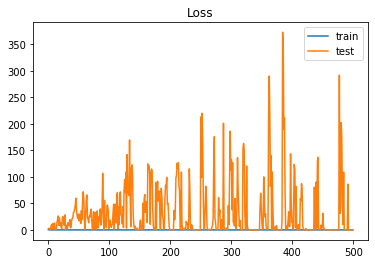

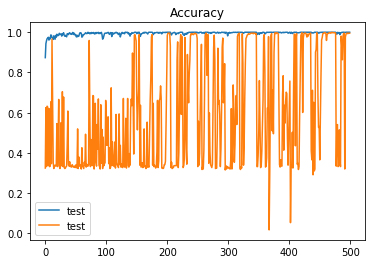

In [9]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# Criando graficos para visualização dos resultados
print()
print()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='test')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Resultados Classificação e Matriz de Confusão
* Para obter os resultados do treinamento e usar o modelo treinado, precisa-se de fato realizar as previsões no dataset a fim de descobrir se o modelo está conseguindo prever de forma correta.
* Foi utilizada a função metrics.classification_report da biblioteca ‘sklearn’.
* Dessa biblioteca, usamos os critérios de ‘precision’, ‘recall’ e ‘f1-score’ para obter as métricas de avaliação de resultados.
* Foram testadas 143 imagens da classe ‘papel’, 146 imagens da classe ‘pedra’ e 150 imagens da classe ‘tesoura’
* Por fim, foi utilizado a biblioteca ‘seaborn’ para a apresentação da matriz de confusão, que é responsável por mostrar a quantidade de imagens previstas corretamente ou incorretamente.

In [10]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size) # Testes por época
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch) # Criação das predições a partir do, predict_generator do modelo
predicted_classes = np.argmax(predictions, axis=1)# classes de predição
true_classes = test_generator.classes #Classes de predição
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)
matrix = confusion_matrix(true_classes,predicted_classes)
df_cm = pd.DataFrame(matrix, index = [i for i in range(3)],
columns = [i for i in range(3)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, linewidths=2.5) 






C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

       paper       0.35      0.34      0.35       143
        rock       0.36      0.36      0.36       146
    scissors       0.37      0.37      0.37       150

    accuracy                           0.36       439
   macro avg       0.36      0.36      0.36       439
weighted avg       0.36      0.36      0.36       439


Matriz de Confusão: 
 [[49 46 48]
 [46 53 47]
 [46 49 55]]
